In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)

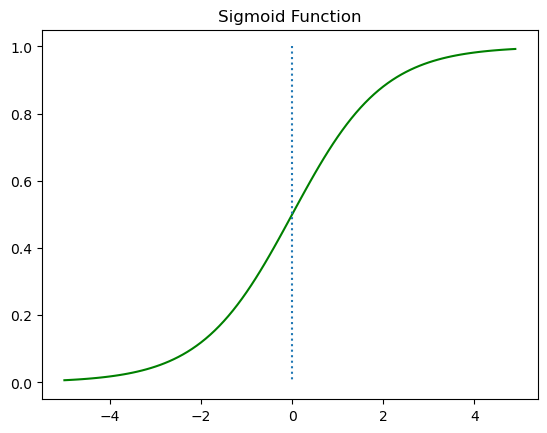

In [11]:
plt.plot(x,y, 'g')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

In [16]:
y1=sigmoid(0.5*x)
y2=sigmoid(x)
y3=sigmoid(2*x)

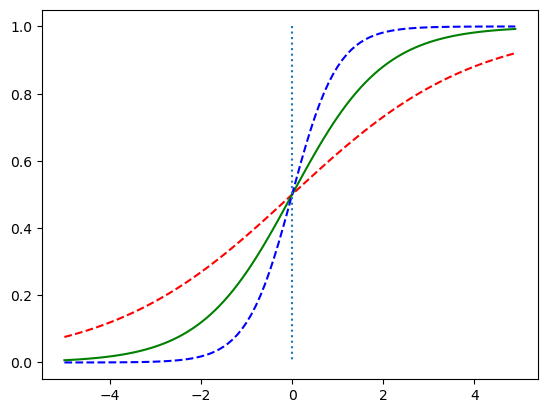

In [18]:
plt.plot(x,y1,'r', linestyle='--')
plt.plot(x,y2,'g')
plt.plot(x,y3,'b', linestyle='--')
plt.plot([0,0], [1.0,0.0],':')
plt.show()

In [20]:
y4=sigmoid(x+1)
y5=sigmoid(x)
y6=sigmoid(x-1)

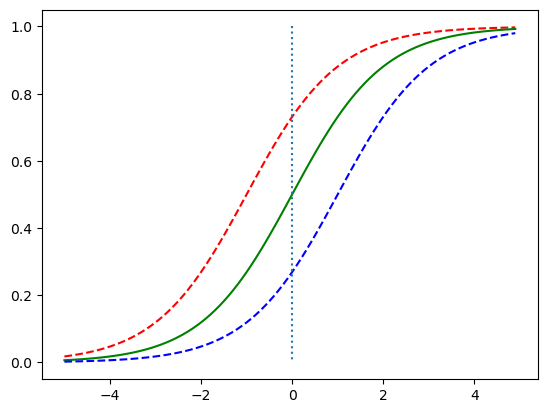

In [21]:
plt.plot(x,y4,'r', linestyle='--')
plt.plot(x,y5,'g')
plt.plot(x,y6,'b', linestyle='--')
plt.plot([0,0], [1.0,0.0],':')
plt.show()

## 손실함수 계산 

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [23]:
torch.manual_seed(1)

In [51]:
x_data=[[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
t_data=[[0],[0],[0],[1],[1],[1]]
x_train=torch.FloatTensor(x_data)
t_train=torch.FloatTensor(t_data)
print(x_train.size())
print(t_train.size())

torch.Size([6, 2])
torch.Size([6, 1])


In [52]:
W=torch.zeros((2,1), requires_grad=True)
b=torch.zeros(1, requires_grad=True)

optimizer=optim.SGD([W,b], lr=0.1)
nb_epoch=1000
costs=[]

In [58]:
for epoch in range(nb_epoch):
    y=x_train.matmul(W)+b
    h=torch.sigmoid(y)

    cost=-(t_train*torch.log(h) + (1-t_train)*torch.log(1-h)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    costs.append(cost.item())

    if epoch%100==0:
        print('Epoch:',epoch, 'Cost:',cost.item())

Epoch: 0 Cost: 0.14737461507320404
Epoch: 100 Cost: 0.1372075080871582
Epoch: 200 Cost: 0.1283654123544693
Epoch: 300 Cost: 0.12060842663049698
Epoch: 400 Cost: 0.1137501522898674
Epoch: 500 Cost: 0.10764380544424057
Epoch: 600 Cost: 0.10217245668172836
Epoch: 700 Cost: 0.0972420871257782
Epoch: 800 Cost: 0.09277603030204773
Epoch: 900 Cost: 0.08871141821146011


In [54]:
h2=torch.sigmoid(x_train.matmul(W)+b)
print(h2)

tensor([[0.0299],
        [0.1576],
        [0.3006],
        [0.7833],
        [0.9408],
        [0.9806]], grad_fn=<SigmoidBackward0>)


In [55]:
prediction=h2>=torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [45]:
print(W)
print(b)

tensor([[3.2398],
        [1.5108]], requires_grad=True)
tensor([-14.4208], requires_grad=True)


In [56]:
import pandas as pd

<Axes: >

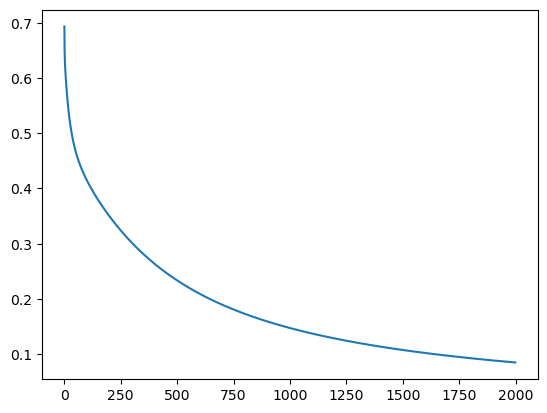

In [59]:
s1=pd.Series(costs)
s1.plot()